In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score

In [53]:
df = pd.read_csv('train_data_no_2023.csv')

In [61]:
len(df)

157196

In [55]:
X = df.drop(['Оценка (без пересдач)', 'Оценка (успеваемость)'], axis=1)
y_no_retakes = df['Оценка (без пересдач)']
y_performance = df['Оценка (успеваемость)']

# OneHotEncoding для категориальных признаков
categorical_features = ['Уровень подготовки', 'Учебная группа', 'Специальность/направление', 'Учебный год', 'Полугодие', 'Дисциплина']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Создание колонного трансформера
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, categorical_features)
    ])

# Создание пайплайна
model_no_retakes = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

model_performance = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train_no_retakes, y_test_no_retakes = train_test_split(X, y_no_retakes, test_size=0.2, random_state=42)
X_train, X_test, y_train_performance, y_test_performance = train_test_split(X, y_performance, test_size=0.2, random_state=42)

# Обучение модели
accuracy_scorer = make_scorer(accuracy_score)
cv_scores_retakes = cross_val_score(model_no_retakes, X, y_no_retakes, cv=5, scoring=accuracy_scorer)
cv_scores_performance = cross_val_score(model_performance, X, y_performance, cv=5, scoring=accuracy_scorer)


<Axes: >

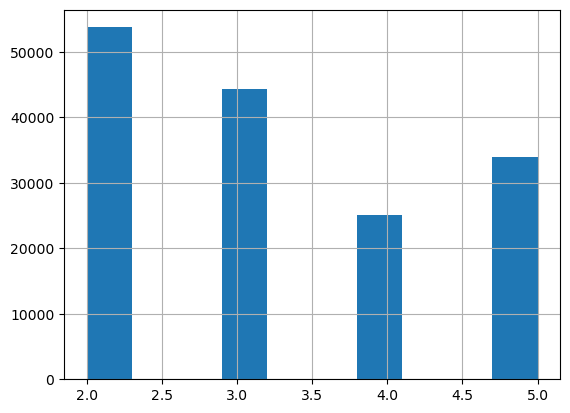

In [56]:
pd.Series(y_no_retakes).hist()

<Axes: >

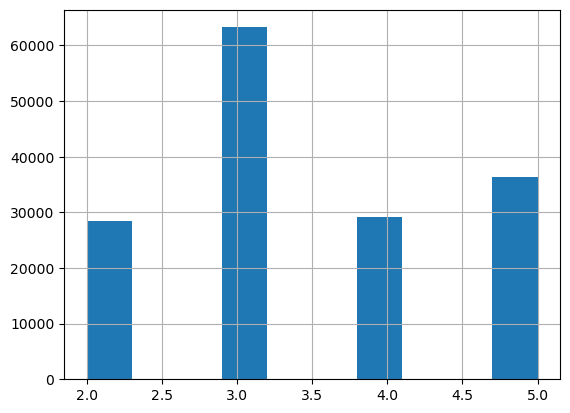

In [57]:
pd.Series(y_performance).hist()

In [38]:
model_no_retakes.fit(X, y_no_retakes)
model_performance.fit(X, y_performance)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Уровень подготовки',
                                                   'Учебная группа',
                                                   'Специальность/направление',
                                                   'Учебный год', 'Полугодие',
                                                   'Дисциплина'])])),
                ('classifier', MultinomialNB())])

In [39]:
test = pd.read_csv('test_data_no_2023.csv')

In [40]:
X_test = test.drop(['Оценка (без пересдач)', 'Оценка (успеваемость)'], axis=1)
y_no_retakes_test = test['Оценка (без пересдач)']
y_performance_test = test['Оценка (успеваемость)']

In [44]:
pred_retakes = model_no_retakes.predict(X_test)
pred_performance = model_performance.predict(X_test)

In [45]:
from sklearn.metrics import classification_report


In [46]:
print(classification_report(y_no_retakes_test ,pred_retakes))

              precision    recall  f1-score   support

           2       0.64      0.43      0.52     20370
           3       0.36      0.60      0.45     14304
           4       0.30      0.11      0.16      9834
           5       0.43      0.53      0.48     15864

    accuracy                           0.44     60372
   macro avg       0.43      0.42      0.40     60372
weighted avg       0.46      0.44      0.43     60372



In [47]:
print(classification_report(y_performance_test , pred_performance))

              precision    recall  f1-score   support

           2       0.64      0.40      0.50     14225
           3       0.43      0.71      0.54     18780
           4       0.30      0.08      0.13     10803
           5       0.47      0.50      0.48     16564

    accuracy                           0.47     60372
   macro avg       0.46      0.42      0.41     60372
weighted avg       0.47      0.47      0.44     60372



In [48]:
np.sqrt(mean_squared_error(y_no_retakes_test ,pred_retakes))

1.3576592309650584

In [49]:
np.sqrt(mean_squared_error(y_performance_test , pred_performance))

1.2473519290707824

<Axes: >

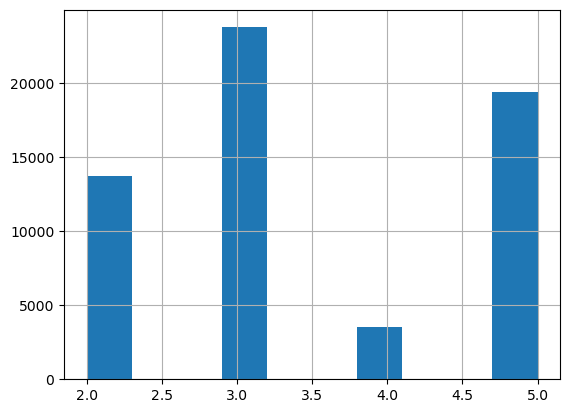

In [50]:
pd.Series(pred_retakes).hist()

<Axes: >

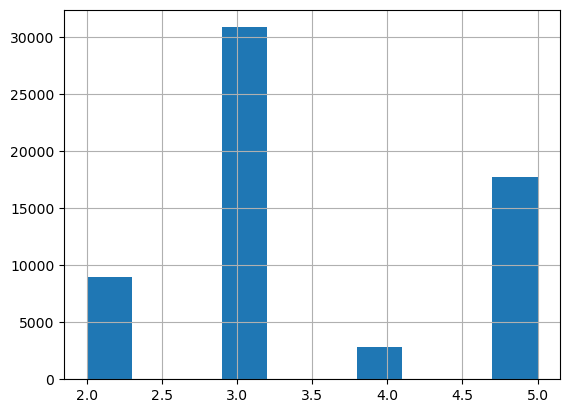

In [51]:
pd.Series(pred_performance).hist()